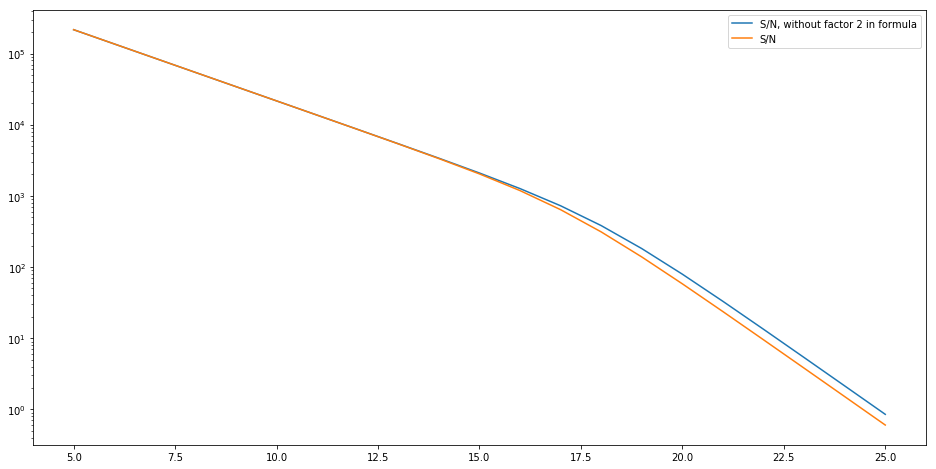

mag,star,sky,RON,S/N,S/N corr
,ph,arcsec2 cm2 s,pix,,
int64,float64,float64,float64,float64,float64
5,46756490084.13433,291777.47800573654,7853.981633974482,216231.7979729041,216231.1051372941
6,18614093972.407352,291777.47800573654,7853.981633974482,136432.38012206196,136431.2820755568
7,7410404283.772,291777.47800573654,7853.981633974482,86081.96480347747,86080.22461233394
8,2950135082.069987,291777.47800573654,7853.981633974482,54312.387915091946,54309.6302772783
9,1174469930.2734923,291777.47800573654,7853.981633974482,34266.169544267854,34261.80049219384
10,467564900.8413433,291777.47800573654,7853.981633974482,21616.323953733285,21609.405475277927
11,186140939.7240735,291777.47800573654,7853.981633974482,13632.380195940874,13621.438979901292
12,74104042.83771992,291777.47800573654,7853.981633974482,8591.019615018595,8573.77321541861


In [10]:
from astropy import units as u
from astropy.table import Table
import numpy as np

def area(r):
    return r**2*np.pi

def flux(mag):
    return 10**(-0.4*mag)

def snr_1(N, BKG, RON2, Delta, p, A, eta, t_exp):
    signal = N*A*eta*t_exp
    noise = np.sqrt(((N+BKG*Delta)*A*eta*t_exp + (Delta/p)*RON2).value)*signal.unit
    return signal/noise

def snr_2(N, BKG, RON2, Delta, p, A, eta, t_exp):
    signal = N*A*eta*t_exp
    noise = np.sqrt(((N+2*BKG*Delta)*A*eta*t_exp + 2*(Delta/p)*RON2).value)*signal.unit
    return signal/noise


mag = np.array(range(5,26))
mag_sky = 21
airm = 1.2
ext = 0.2

f = flux(mag+ext*airm)
f_sky = flux(mag_sky)/u.arcsec**2
N_0 = 8.66e5*u.photon/u.s/u.cm**2
N = N_0 * f
BKG = N_0 * f_sky

A = area(350*u.cm/2)
eta = 0.7
t_exp = 100*u.s

fwhm = 1*u.arcsec
ar = 2*u.arcsec
Delta = area(ar)
pixsize = 0.2 * u.arcsec
p = pixsize**2/u.pixel

RON = 5*u.photon/u.pixel
RON2 = RON.value**2 * RON.unit

out_1 = snr_1(N, BKG, RON2, Delta, p, A, eta, t_exp)
out_2 = snr_2(N, BKG, RON2, Delta, p, A, eta, t_exp)

star_c = N * A*eta*t_exp
sky_c = [BKG.value]*len(mag) * Delta*A*eta*t_exp
ron_c = [RON2.value]*len(mag) * Delta/p
results = Table([mag, star_c, sky_c, ron_c, out_1, out_2], names=('mag', 'star', 'sky', 'RON', 'S/N', 'S/N corr'))

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.semilogy(mag, out_1, label='S/N, without factor 2 in formula')
plt.semilogy(mag, out_2, label='S/N')
plt.legend()
plt.show()
results